In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import re
import seaborn as sns
# Created by Ihsan and Ary

#### Membaca Data

In [2]:
data = pd.read_csv(r'C:\Users\Gus Ary\Downloads\jawapos.csv')
data.head()

Unnamed: 0                                              title  \
0           0             Taiwan Batalkan Festival Besar Lampion   
1           1  Sebut Bali Ramah LGBT, Kristeb Gray Ditangkap ...   
2           2  Uji klinis Awal Sebut Vaksin Covid-19 Rusia 10...   
3           3  Masyarakat Harus Disiplin Terapkan Protokol Ke...   
4           4  Belasan Motor Bodong dari Jawa Gagal Diselundu...   

                                             content  \
0  elasa membatalkan festival besar selama libura...   
1  h Hukum dan HAM Bali melakukan upaya hukum ter...   
2  s kesehatan konsumen di Rusia, Rospotrebnadzor...   
3  ologi Fakultas Kesehatan Masyarakat Universita...   
4  it sepeda motor bodong atau tanpa dilengkapi s...   

                                             summary  \
0  Taiwan pada Selasa membatalkan festival besar ...   
1  KANTOR Wilayah Hukum dan HAM Bali melakukan up...   
2  Badan pengawas kesehatan konsumen di Rusia, Ro...   
3  PAKAR epidemiologi Fakultas Kesehatan Masyarak...   
4  SEKITAR 16 unit sepeda motor bodong atau tanpa...   

                                                link            published  
0  https://mediaindonesia.com/read/detail/378367-...  2021-01-19 23:55:40  
1  https://mediaindonesia.com/read/detail/378383-...  2021-01-19 23:55:19  
2  https://mediaindonesia.com/read/detail/378380-...  2021-01-19 23:38:20  
3  https://mediaindonesia.com/read/detail/378379-...  2021-01-19 23:35:43  
4  https://mediaindonesia.com/read/detail/378378-...  2021-01-19 23:35:05

#### Fungsi untuk preprocessing text (Cleaning)

In [3]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """Fungsi ini membersihkan teks input dengan
     - menghapus link
     - menghapus karakter khusus
     - menghapus nomor
     - menghapus stopwords
     - mengubah dalam huruf kecil
     - menghapus spasi yang berlebihan
     Argumen:
         teks (str): teks untuk dibersihkan
         remove_stopwords (bool): True = hapus stopwords atau False = tidak
     """
    # Hapus links
    text = re.sub(r"http\S+", "", str(text))
    # Hapus nomor dan karakter khusus
    text = re.sub("[^A-Za-z]+", " ", str(text))
    # Hapus stopwords
    if remove_stopwords:
        # 1. Membuat Token
        tokens = nltk.word_tokenize(text)
        # 2. Mengecek token apabila terdapat stopwords maka dihapus
        stopwords_ind = stopwords.words("indonesian")
        stopwords_ind += ['com','rp','m','ol'] #tambahan apabila stopwords tidak terdapat dalam corpus
        tokens = [w for w in tokens if not w.lower() in stopwords_ind]
        # 3. Mengabungkan token kembali
        text = " ".join(tokens)
    #mereturn text yang sudah dicleaning dengan huruf kecil
    text = text.lower().strip()
    return text

#### Fungsi untuk membuat WordCloud

In [4]:
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words)) #menghitung frekuensi tiap kata
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True) #melakukan urutan berdasarkan frekuensi kata tertinggi
    word_string=str(popular_words) #mengubah tipe data menjadi string
    wordcloud = WordCloud(stopwords=stopwords.words("indonesian"),
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

#### Fungsi untuk membuat WordBarGraph

In [5]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words[0:50]))
    plt.title(title)
    plt.show()

#### Membuat data baru dari kolom title, content, dan summary yang sudah di preprocessing

In [6]:
data['cleanedtitle'] = data['title'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
data['cleanedsummary'] = data['summary'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
data['cleanedcontent'] = data['content'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
data.head()

Unnamed: 0                                              title  \
0           0             Taiwan Batalkan Festival Besar Lampion   
1           1  Sebut Bali Ramah LGBT, Kristeb Gray Ditangkap ...   
2           2  Uji klinis Awal Sebut Vaksin Covid-19 Rusia 10...   
3           3  Masyarakat Harus Disiplin Terapkan Protokol Ke...   
4           4  Belasan Motor Bodong dari Jawa Gagal Diselundu...   

                                             content  \
0  elasa membatalkan festival besar selama libura...   
1  h Hukum dan HAM Bali melakukan upaya hukum ter...   
2  s kesehatan konsumen di Rusia, Rospotrebnadzor...   
3  ologi Fakultas Kesehatan Masyarakat Universita...   
4  it sepeda motor bodong atau tanpa dilengkapi s...   

                                             summary  \
0  Taiwan pada Selasa membatalkan festival besar ...   
1  KANTOR Wilayah Hukum dan HAM Bali melakukan up...   
2  Badan pengawas kesehatan konsumen di Rusia, Ro...   
3  PAKAR epidemiologi Fakultas Kesehatan Masyarak...   
4  SEKITAR 16 unit sepeda motor bodong atau tanpa...   

                                                link            published  \
0  https://mediaindonesia.com/read/detail/378367-...  2021-01-19 23:55:40   
1  https://mediaindonesia.com/read/detail/378383-...  2021-01-19 23:55:19   
2  https://mediaindonesia.com/read/detail/378380-...  2021-01-19 23:38:20   
3  https://mediaindonesia.com/read/detail/378379-...  2021-01-19 23:35:43   
4  https://mediaindonesia.com/read/detail/378378-...  2021-01-19 23:35:05   

                                        cleanedtitle  \
0                   taiwan batalkan festival lampion   
1      bali ramah lgbt kristeb gray ditangkap aparat   
2              uji klinis vaksin covid rusia efektif   
3    masyarakat disiplin terapkan protokol kesehatan   
4  belasan motor bodong jawa gagal diselundupkan ...   

                                      cleanedsummary  \
0  taiwan selasa membatalkan festival liburan iml...   
1  kantor wilayah hukum ham bali upaya hukum warg...   
2  badan pengawas kesehatan konsumen rusia rospot...   
3  pakar epidemiologi fakultas kesehatan masyarak...   
4  unit sepeda motor bodong dilengkapi surat sura...   

                                      cleanedcontent  
0  elasa membatalkan festival liburan imlek pulau...  
1  h hukum ham bali upaya hukum warga negara asin...  
2  s kesehatan konsumen rusia rospotrebnadzor men...  
3  ologi fakultas kesehatan masyarakat universita...  
4  it sepeda motor bodong dilengkapi surat surat ...

#### Visualisasi dalam bentuk Wordcloud dari kolom title, content, dan summary

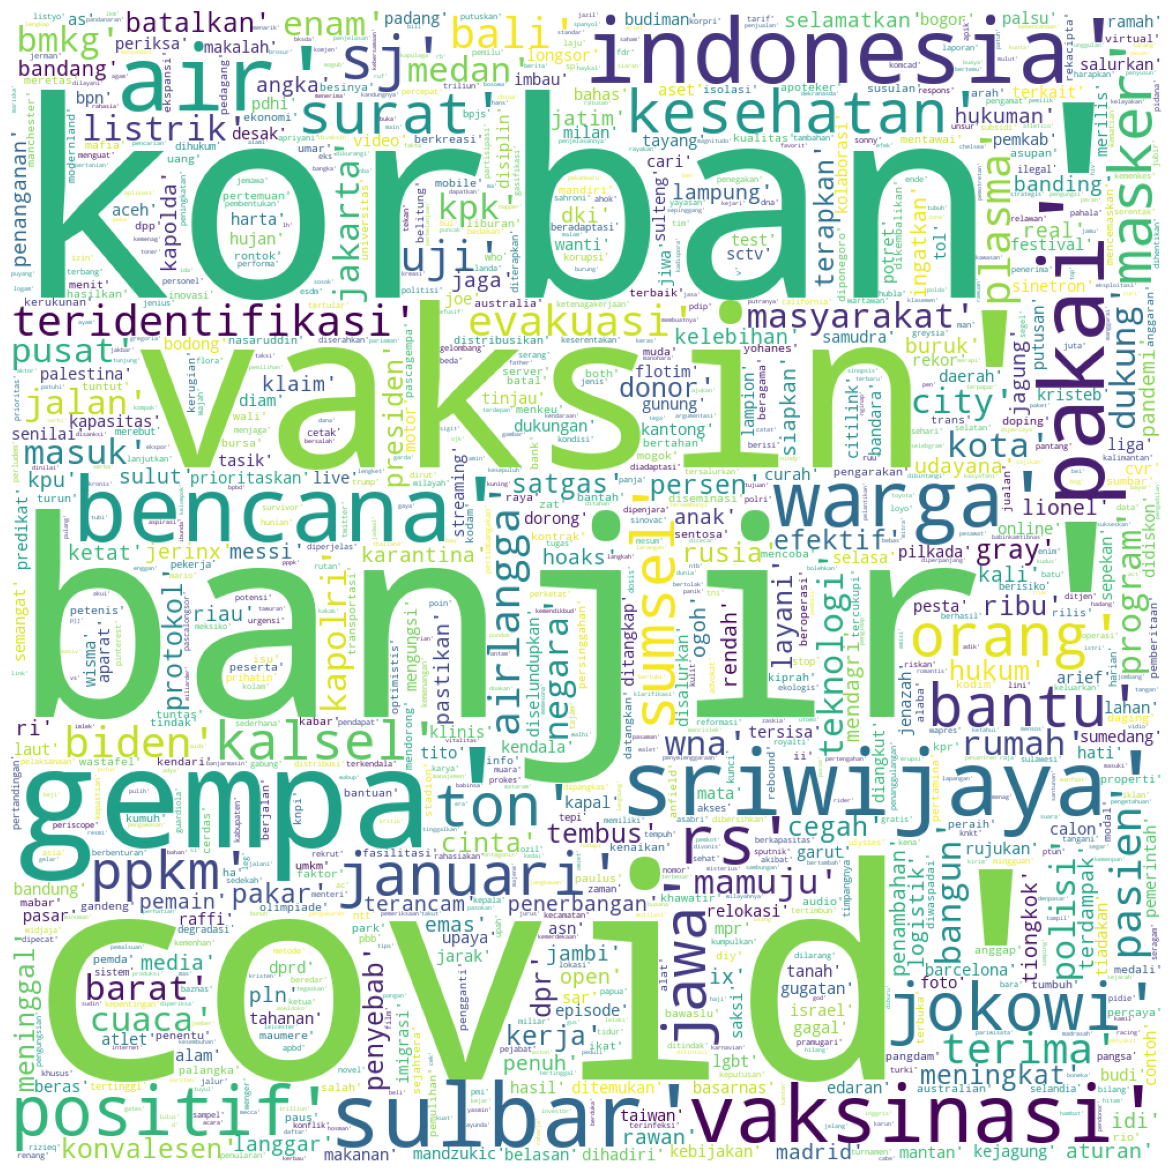

In [7]:
plt.figure(figsize=(15,15))
wordCloudFunction(data,'cleanedtitle',10000000)

In [8]:
plt.figure(figsize=(15,15))
wordCloudFunction(data,'cleanedsummary',10000000)

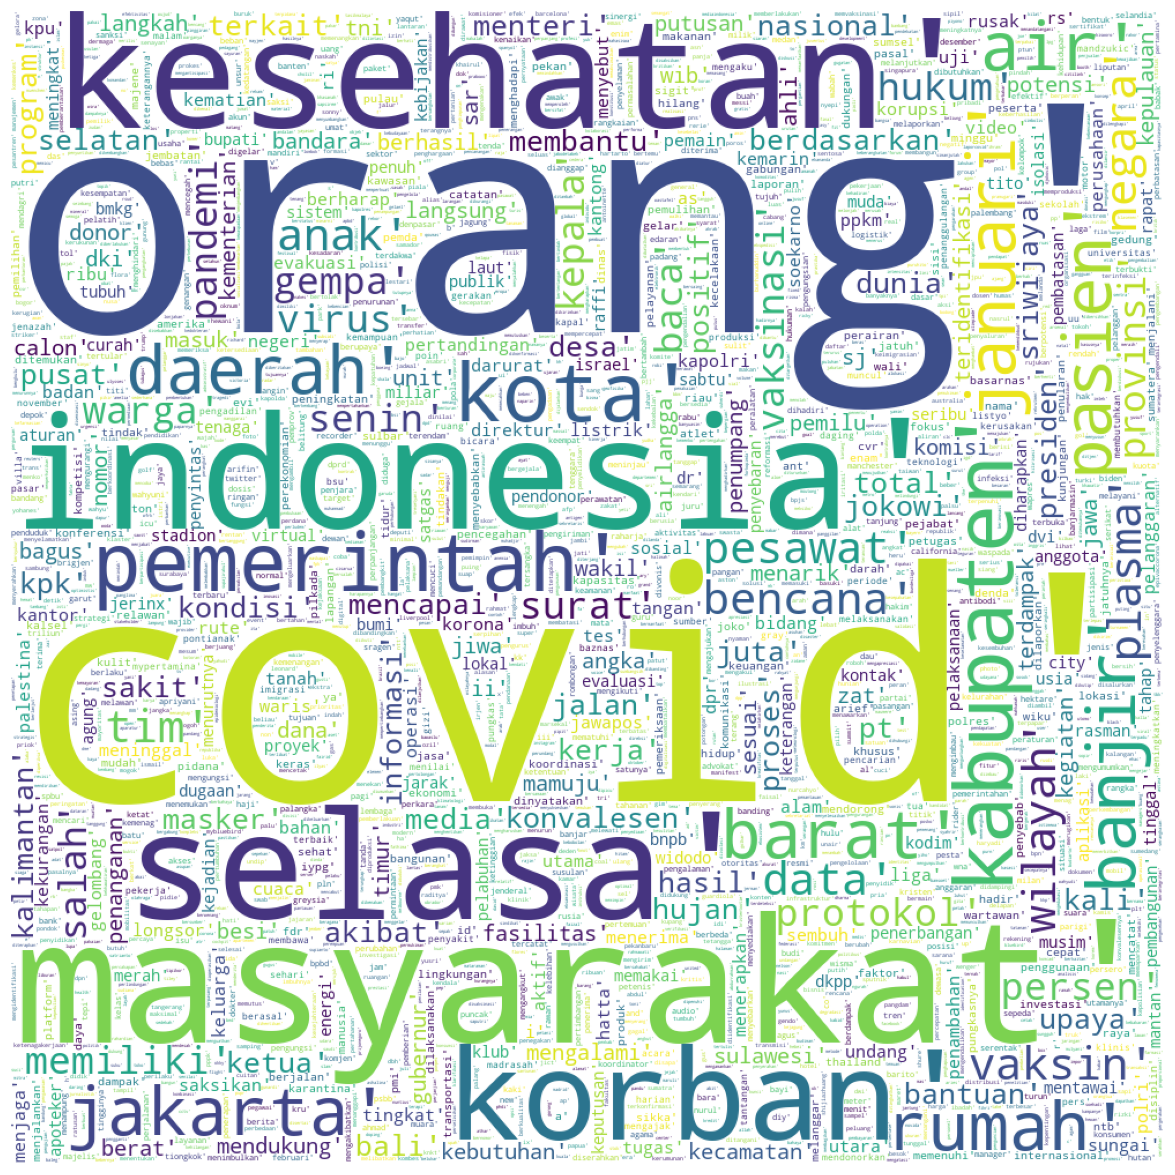

In [9]:
plt.figure(figsize=(15,15))
wordCloudFunction(data,'cleanedcontent',10000000)

#### Visualisasi dalam bentuk BarGraph dari kolom title, content, dan summary

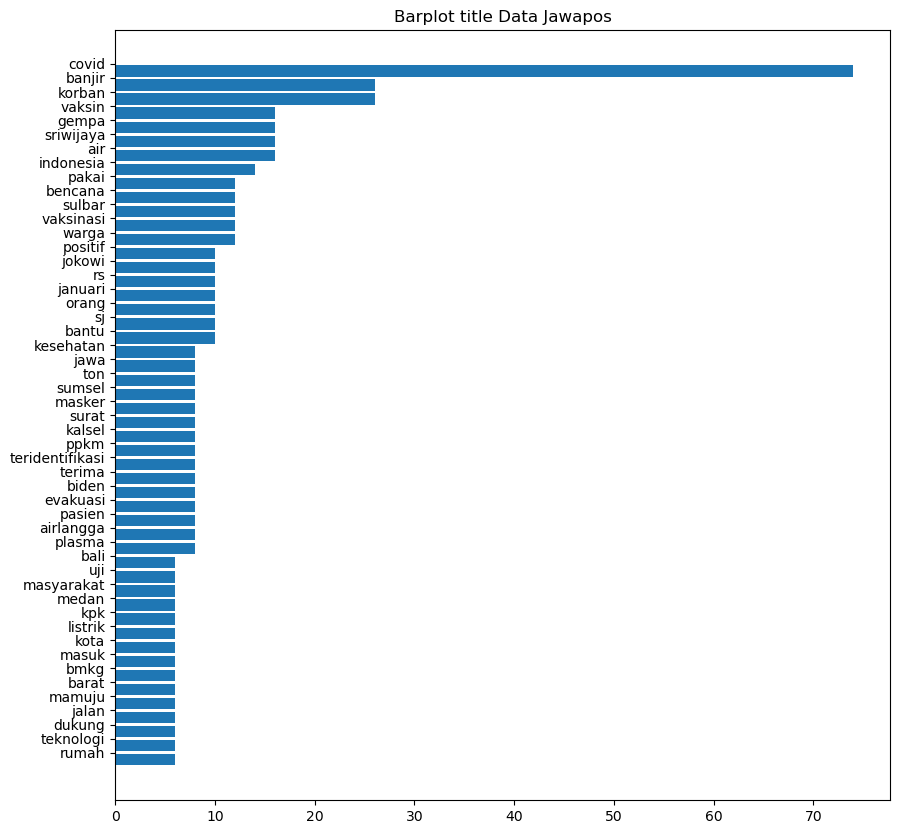

In [10]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(data,'cleanedtitle',"Barplot title Data Jawapos")

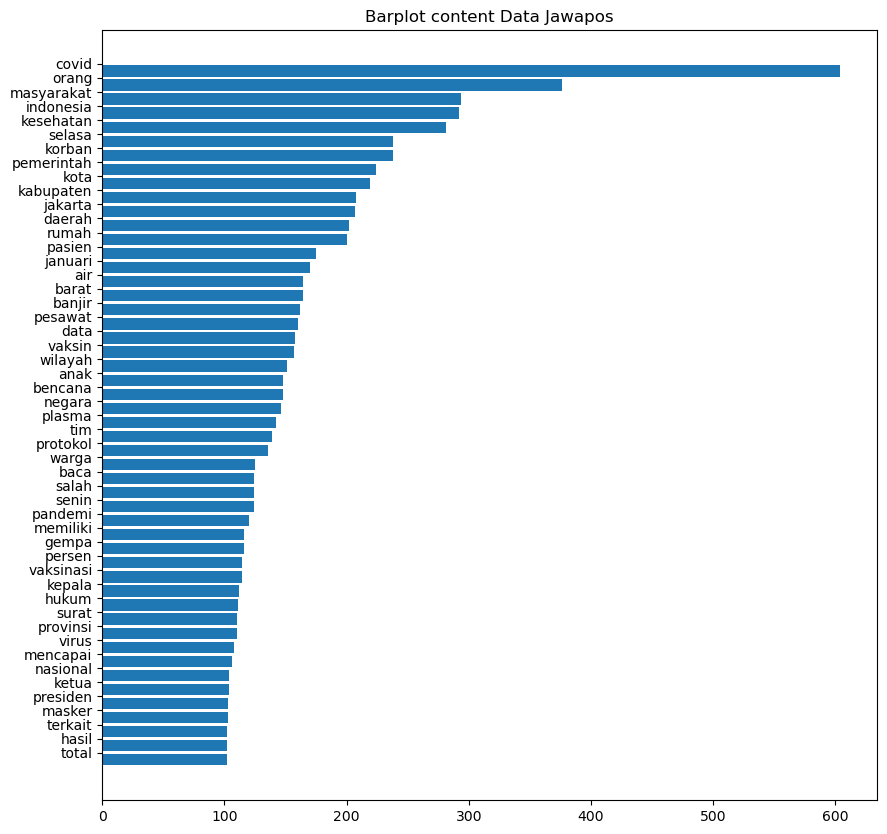

In [11]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(data,'cleanedcontent',"Barplot content Data Jawapos")

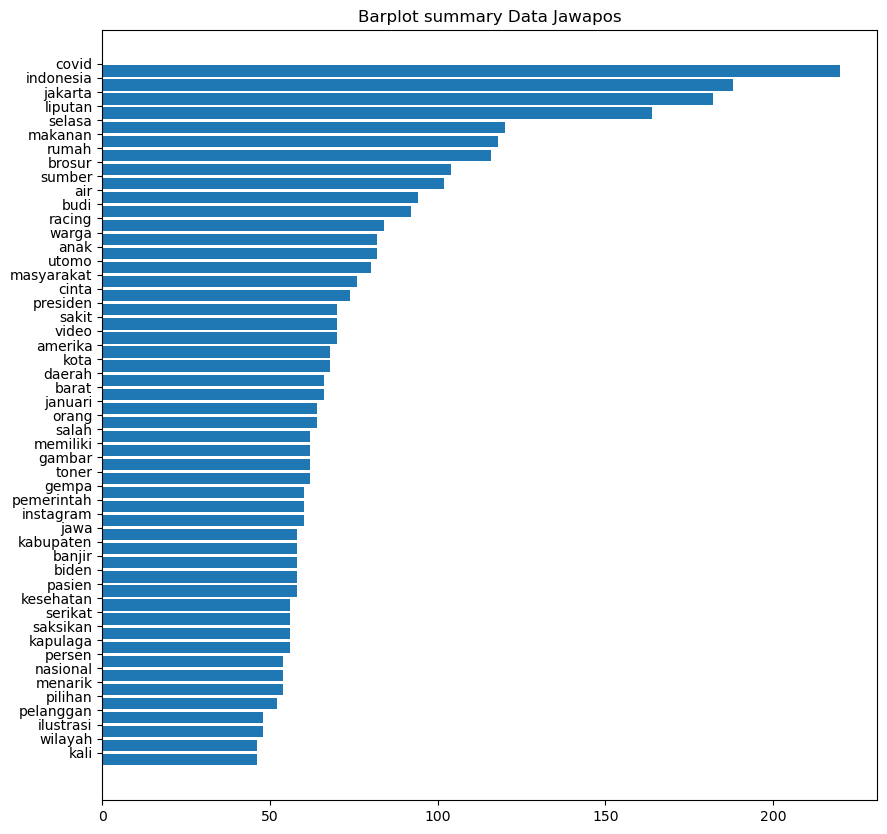

In [12]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(data,'cleanedsummary',"Barplot summary Data Jawapos")

#### Clustering menggunakan KMeans + TF-IDF


In [13]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform menerapkan TF-IDF untuk membersihkan teks 
tfidf = vectorizer.fit_transform(data['cleanedtitle'])

# inisialisasi kmeans dengan 3 centroids
kmeans = KMeans(n_clusters=3, random_state=20)
# fit model
kmeans.fit(tfidf)
# simpan label cluster dalam sebuah variabel
clusters = kmeans.labels_
# inisialisasi PCA dengan 2 components
pca = PCA(n_components=2, random_state=42)
# tfidf ke pca
pca_vecs = pca.fit_transform(tfidf.toarray())
# simpan ke dalam x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

#membuat kolom baru untuk clusters, x0, dan x1
data['cluster'] = clusters
data['x0'] = x0
data['x1'] = x1

def get_top_keywords(n_terms):
    """Fungsi ini mengembalikan kata kunci untuk setiap centroid KMeans"""
    df = pd.DataFrame(tfidf.todense()).groupby(clusters).mean() # mengelompokkan vektor TF-IDF berdasarkan cluster
    terms = vectorizer.get_feature_names_out() 
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))# untuk setiap baris kerangka data, temukan n suku yang memiliki skor tf idf tertinggi
            
get_top_keywords(5)


Cluster 0
januari,biden,ton,indonesia,pakai

Cluster 1
gempa,jokowi,sulbar,korban,banjir

Cluster 2
ppkm,vaksinasi,vaksin,positif,covid


#### Visualisasi Clustering

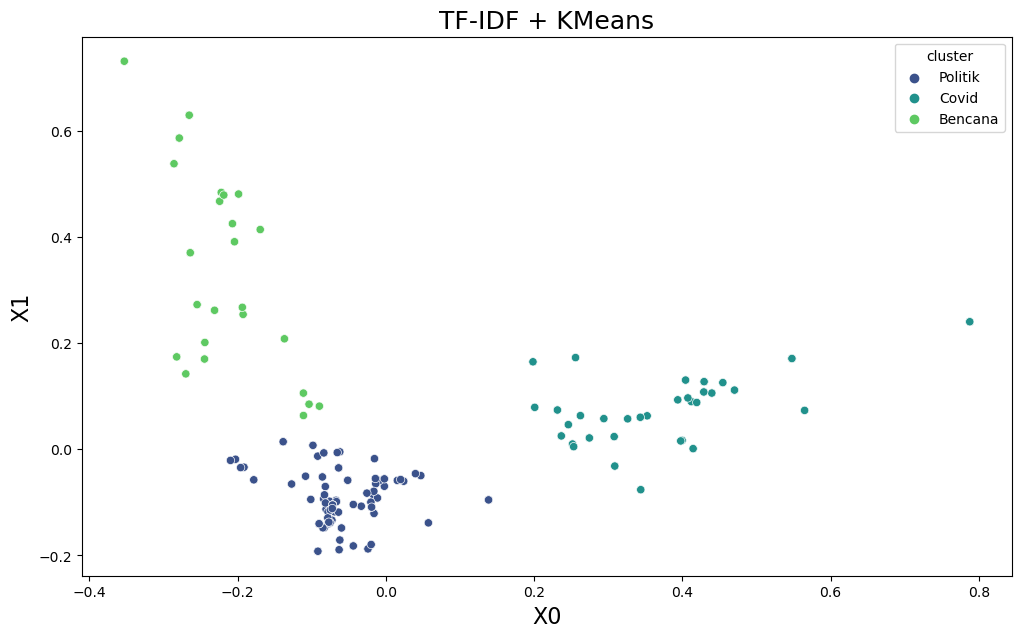

In [14]:
cluster_map = {0: "Politik", 1: "Bencana", 2: "Covid"} # mapping found through get_top_keywords
data['cluster'] = data['cluster'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("TF-IDF + KMeans", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=data, x='x0', y='x1', hue='cluster', palette="viridis")

plt.show()